In [6]:
# Red neuronal
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout 
from tensorflow.keras.models import Model

# Otros
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import utils
from preprocessing import preprocessing_significantes
from preprocessing import preprocessing_base_parte_1

# Metricas
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [7]:
df = utils.get_data()

In [9]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, random_state=27)

X_train_1, X_test_1 = preprocessing_base_parte_1(X_train_1, X_test_1)

In [73]:
n_in = X_train_1.shape[1]
m = Sequential()
m.add(Dense(n_in, input_dim=n_in))
m.add(Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                                   activity_regularizer=tf.keras.regularizers.l2(0.001)))
#m.add(Dropout(0.2))
m.add(Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                                   activity_regularizer=tf.keras.regularizers.l2(0.001)))
#m.add(Dropout(0.2))
m.add(Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                                   activity_regularizer=tf.keras.regularizers.l2(0.001)))
#m.add(Dropout(0.2))
m.add(Dense(1, activation='sigmoid'))


In [74]:
m.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

In [75]:
m.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [76]:
h = m.fit(X_train_1, y_train_1, epochs=200, batch_size=10, verbose=4, validation_split=0.3)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

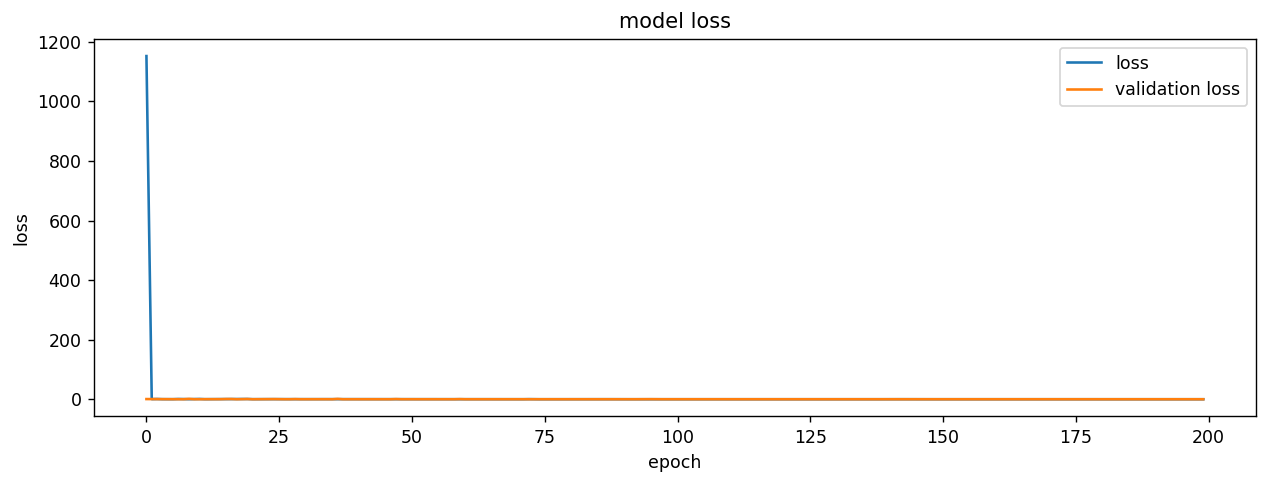

In [77]:
plt.figure(dpi=125, figsize=(12, 4))
plt.plot(h.history['loss'], label="loss")
plt.plot(h.history['val_loss'], label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

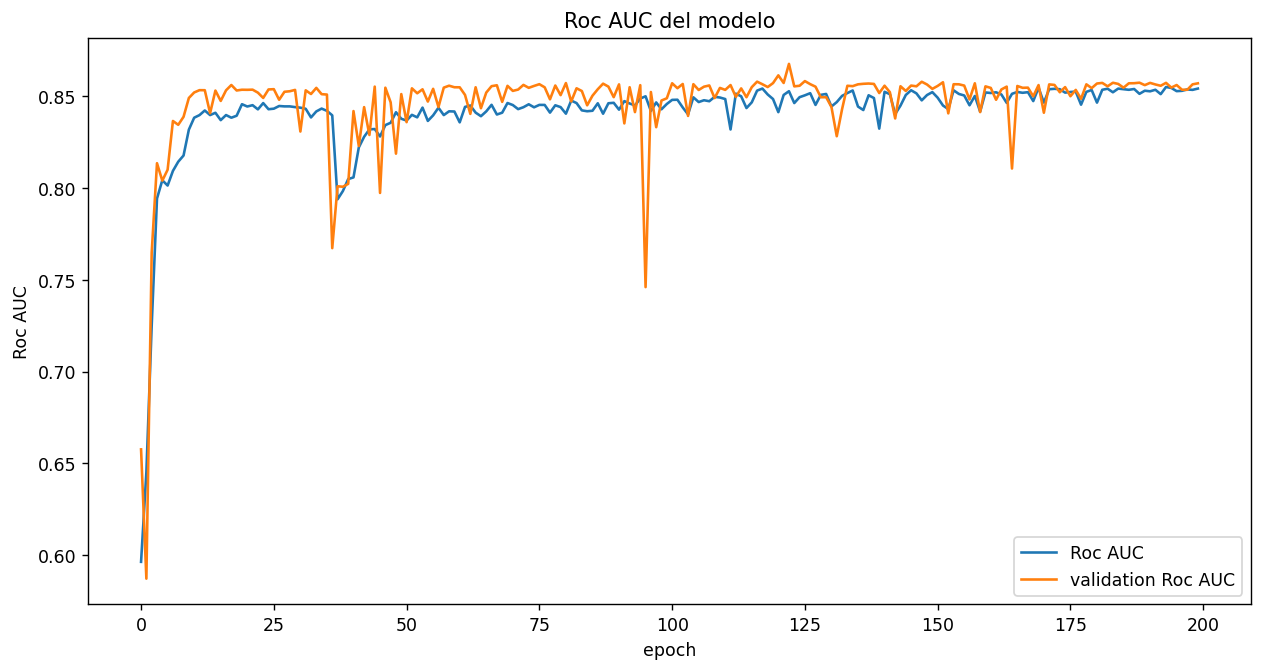

In [79]:
plt.figure(dpi=125, figsize=(12, 6))
plt.plot(h.history['auc_9'], label="Roc AUC")
plt.plot(h.history['val_auc_9'], label="validation Roc AUC")
plt.title('Roc AUC del modelo')
plt.ylabel('Roc AUC')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [97]:
print(classification_report(y_test_1, h.model.predict(X_test_1, verbose=4) > 0.5))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6186
           1       0.65      0.51      0.57      1955

    accuracy                           0.82      8141
   macro avg       0.75      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



In [54]:
from sklearn.metrics import roc_auc_score

In [81]:
roc_auc_score(y_test_1, h.model.predict(X_test_1))

0.8660340195623646